#### **1.Understanding bsub Command Embeddings through Dimensionality Reduction** 

**This notebook explores the use of dimensionality reduction and clustering techniques,specifically PCA(Principal Component Analysis) and K-means clustering on embeddings generated for the bsub commands using TinyBERT.**

**The goal was to analyse and interpret the structure of these high-dimensional(768-dimensional) embeddings in a lower-dimensional(2D) space for better visualization and exploratory data analysis (EDA).**

**The following Python libraries were used to perform the analysis:**

**a. json, numpy, and matplotlib for data handling and visualization.**

**b. scikit-learn for preprocessing, PCA, and clustering methods.**



 *Why Dimensionality Reduction approch?*  
 Each embedding is a high-dimensional vector; in our case, a 768-dimensional one, which is difficult to interpret or visualize directly. Dimensionality reduction, such as PCA, helps reduce these vectors to lower dimensions while preserving as much of the original information (variance) as possible. This makes it easier to explore and understand the data.

##### ***1.1 Importing all the necessary Libraries***

In [83]:

import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
        (KMeans)


##### ***1.2 Loading our embeddings file with 69648 embeddings: Convert them to numpy array; Squeeze in the extra dimension.***

In [84]:
#Load the embedding file
embedding_file_path='/Users/dn10/Downloads/bsub_memory/embedding.json'
with open(embedding_file_path, 'r') as file:
    load_embeddings = json.load(file)

In [85]:
#Convert the loaded embeddings into numpy array
embeddings = np.array(load_embeddings)

In [ ]:
# Print the first few elements of the embeddings array
print(embeddings[:5])
print(embeddings.shape)
# Remove the extra dimension if it exists
if embeddings.ndim > 2:
    embeddings = embeddings.squeeze()
    print("Squeezed embeddings shape:", embeddings.shape)
else:
    print("Embeddings shape remains:", embeddings.shape)

[[[-0.42838502  0.10773344  0.0943258  ...  0.09901612 -0.0380051
   -0.01435884]]

 [[-0.50906807  0.02968216  0.13967223 ... -0.01528042 -0.0829258
   -0.07494247]]

 [[-0.44487637  0.06140267  0.12802978 ... -0.02892042 -0.02176341
   -0.02611397]]

 [[-0.45008546 -0.00253696  0.13319308 ... -0.07946518 -0.10268664
   -0.06494731]]

 [[-0.48691761  0.05609686  0.10483919 ... -0.02536329 -0.03388542
   -0.01120744]]]
(69648, 1, 768)
Squeezed embeddings shape: (69648, 768)


##### ***1.3 Standardisation***

*Scaling was performed using StandardScaler() to transform the data such that each dimension has a mean of 0 and a standard deviation of 1. The scaler was first fit to the embeddings to compute the means and standard deviations, then the embeddings were transformed accordingly to have zero mean and unit variance. This is done to prevent PCA from being biased by dimensions with larger scales when identifying directions of maximum variance.*

In [ ]:
#Scale the embeddings
scaler = StandardScaler(with_std=True, with_mean=True)
embeddings_scaled = scaler.fit_transform(embeddings)
embeddings_scaled.shape

(69648, 768)

In [88]:
embeddings_scaled.mean()

4.035068558562791e-18

##### ***1.4 Performing PCA***

*After the PCA model is fitted to the embeddings, the transform() method can be used to compute the corresponding principal component scores.*

In [89]:
#Initialize PCA
pca = PCA()

In [90]:
# Fit PCA on the scaled embeddings
pca_embedding = pca.fit(embeddings_scaled)

In [91]:
#Access the mean of the PCA embedding
pca_embedding.mean_

array([-3.63602504e-17, -8.35002550e-17,  4.60524649e-16,  1.60983599e-16,
        1.55069056e-16, -1.87064801e-16,  3.45408670e-15,  1.02692601e-17,
        1.21795202e-15, -1.82715439e-15, -9.67142809e-16, -3.22444306e-15,
        5.14176342e-16,  1.14161622e-15,  2.09744925e-17,  1.60629496e-16,
        6.87165693e-16,  6.21997795e-18,  3.53046913e-16, -6.81729987e-16,
       -2.06428985e-15, -1.35315604e-16,  2.53104643e-15,  3.48181677e-15,
        1.80248649e-16, -3.06812129e-16, -5.24225066e-15,  9.62218793e-16,
       -2.48926642e-17, -3.91345327e-16,  4.78931926e-16,  4.90220979e-16,
        6.92935253e-16,  9.06554613e-16, -1.44796049e-15,  1.92871601e-15,
       -1.10385321e-15,  9.61708697e-16,  6.28675265e-16,  4.36952654e-16,
        1.17598550e-15, -9.81411139e-16,  6.40966974e-17, -8.51119020e-15,
       -7.07235961e-16,  7.45022646e-15,  8.82092342e-16, -1.55281383e-15,
       -5.09906683e-16, -3.02610216e-15, -4.40807701e-15, -7.29546665e-16,
       -2.15935413e-15,  

In [92]:
#Computing the PCA scores
scores=pca_embedding.transform(embeddings_scaled)

In [ ]:
#storing the principal components loadings for each row
pca_components=pca_embedding.components_
print(pca_components)

[[-0.02216079  0.03731736  0.0632785  ... -0.04942937 -0.02712676
  -0.04548724]
 [-0.02236313 -0.06493503 -0.00082753 ...  0.00413429 -0.06024807
  -0.01604153]
 [-0.02819517 -0.04173344 -0.03509857 ... -0.02569342  0.02117021
   0.04200461]
 ...
 [-0.02849184 -0.08609204 -0.07617671 ...  0.01829914 -0.0031549
  -0.00068239]
 [-0.01952337  0.02574598 -0.02598419 ... -0.02455459 -0.02568892
   0.02130922]
 [ 0.02658135  0.04720576  0.04513048 ...  0.03913046  0.03369559
   0.03006327]]


##### ***1.5 Plotting and Interpreting PCA***


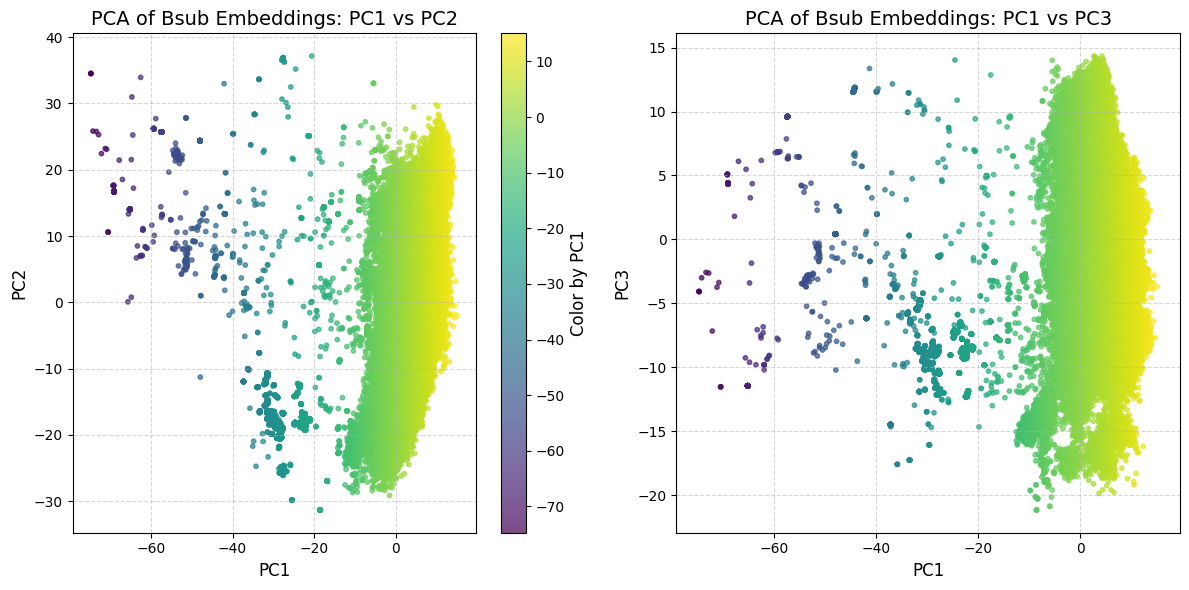

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot PC1 vs PC2
ax = axes[0]
scatter1 = ax.scatter(scores[:, 0], scores[:, 1], alpha=0.7, c=scores[:, 0], cmap='viridis', s=10)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('PCA of Bsub Embeddings: PC1 vs PC2', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
cbar = plt.colorbar(scatter1, ax=ax)
cbar.set_label('Color by PC1', fontsize=12)
# Plot PC1 vs PC3
ax = axes[1]
scatter2 = ax.scatter(scores[:, 0], scores[:, 2], alpha=0.7, c=scores[:, 0], cmap='viridis', s=10)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC3', fontsize=12)
ax.set_title('PCA of Bsub Embeddings: PC1 vs PC3', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



*The two PCA plots (PC1 vs PC2 and PC1 vs PC3) both have PC1 on the x-axis, while the y-axis shows PC2 (left plot) or PC3 (right plot). To identify which principal component shows the strongest structure, we look at the distribution and clustering of points along each axis.*

*In both plots, many points are densely clustered on the right side of the x-axis, forming a distinct group. The color gradient, based on PC1 values, changes smoothly along the horizontal axis, indicating a strong separation along PC1.*

*In contrast, the points are more widely spread along PC2 and PC3, suggesting these components capture less variance compared to PC1.*

*Commands that are semantically or structurally similar tend to be grouped closely along PC1.*

*While PC2 and PC3 capture some additional variation, it is not as significant as PC1, which points at  PC1 accounting for most of the variation in the embedding space.*

In [95]:
#Standard deviation of the prinicipal component scores
scores_std = scores.std(0, ddof=1)
scores_std

array([1.26264457e+01, 1.09048559e+01, 7.48692346e+00, 6.65377781e+00,
       6.36232124e+00, 5.67440999e+00, 5.30226433e+00, 4.83083653e+00,
       4.51281214e+00, 4.25082606e+00, 3.86441624e+00, 3.66415609e+00,
       3.58979576e+00, 3.29890987e+00, 3.20420004e+00, 2.96456727e+00,
       2.76215273e+00, 2.67087666e+00, 2.57323168e+00, 2.52574101e+00,
       2.34400860e+00, 2.25320161e+00, 2.24543914e+00, 2.16087229e+00,
       2.10587277e+00, 2.04222296e+00, 2.01063383e+00, 1.95928768e+00,
       1.84658569e+00, 1.73051437e+00, 1.68619695e+00, 1.67779099e+00,
       1.64929303e+00, 1.57893539e+00, 1.55761446e+00, 1.51385967e+00,
       1.51152636e+00, 1.46231811e+00, 1.45767454e+00, 1.38433519e+00,
       1.33978187e+00, 1.32869323e+00, 1.30863105e+00, 1.27304430e+00,
       1.23060524e+00, 1.21477564e+00, 1.20693257e+00, 1.17489685e+00,
       1.15600922e+00, 1.12857916e+00, 1.09574989e+00, 1.06870698e+00,
       1.06430992e+00, 1.03658666e+00, 1.01201486e+00, 1.00312920e+00,
      

##### ***1.6 Proportion of Variance explained***

*After PCA, it's important to evaluate how much variance each principal component explains. This is used to determine how many components we need to keep to preserve most of the information*

In [96]:
#Variance of each principal component score
explained_variance = pca_embedding.explained_variance_

# the proportion of variance explained by each principal component
explained_variance_ratio=pca_embedding.explained_variance_ratio_
explained_variance_ratio


array([2.07584428e-01, 1.54836165e-01, 7.29859610e-02, 5.76459941e-02,
       5.27064458e-02, 4.19250864e-02, 3.66062544e-02, 3.03862584e-02,
       2.65171628e-02, 2.35276858e-02, 1.94446594e-02, 1.74815717e-02,
       1.67792299e-02, 1.41701173e-02, 1.33681647e-02, 1.14434023e-02,
       9.93408618e-03, 9.28838501e-03, 8.62164873e-03, 8.30634904e-03,
       7.15403311e-03, 6.61047472e-03, 6.56500592e-03, 6.07982031e-03,
       5.77426623e-03, 5.43048792e-03, 5.26378952e-03, 4.99837641e-03,
       4.43988247e-03, 3.89926689e-03, 3.70210850e-03, 3.66528929e-03,
       3.54183390e-03, 3.24609526e-03, 3.15902079e-03, 2.98403411e-03,
       2.97484262e-03, 2.78430151e-03, 2.76664655e-03, 2.49525573e-03,
       2.33722615e-03, 2.29869837e-03, 2.22980551e-03, 2.11018037e-03,
       1.97183269e-03, 1.92143056e-03, 1.89669962e-03, 1.79734739e-03,
       1.74002359e-03, 1.65842790e-03, 1.56334712e-03, 1.48713310e-03,
       1.47492101e-03, 1.39908395e-03, 1.33354085e-03, 1.31022624e-03,
      

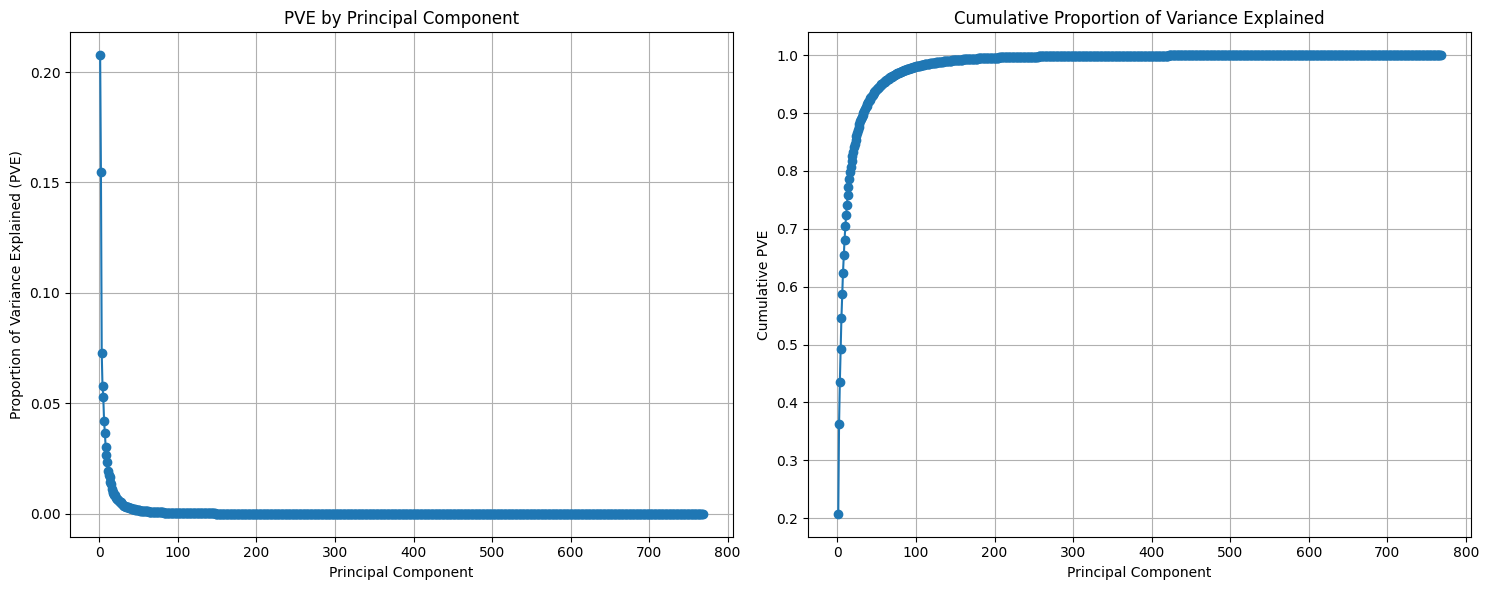

In [97]:
#Compute number of components
ticks = np.arange(pca_embedding.n_components_)+1

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot individual PVE (scree plot)
ax = axes[0]
ax.plot(ticks, explained_variance_ratio, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained (PVE)')
ax.set_title('PVE by Principal Component')
ax.grid(True)

# Plot cumulative PVE
ax = axes[1]
ax.plot(ticks, explained_variance_ratio.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE')
ax.set_title('Cumulative Proportion of Variance Explained')
ax.grid(True)

plt.tight_layout()
plt.show()

***1.6.1 Proportion of Variance Explained (PVE)(left side plot):***

*The PVE plot shows the variance captured by each principal component. Here, PC1 captures the most variance, just over 20%; while PC2, PC3, and others capture progressively smaller amounts. The elbow shape in the curve indicates the point where additional components contribute less significantly.*

***1.6.2 Cumulative Proportion of Variance Explained(right side plot):***

*The cumulative PVE plot shows the total variance explained as more components are included. This graph helps identify how many components are necessary to retain a target level of variance.*

*Overall, these plots indicate that using the top few principal components will help us achieve a significant reduction in dimensionality, reducing complexity while preserving most of the information.*

##### ***1.7 K-means Clustering***

In [98]:
#Perform PCA to reduce scaled embeddings to 2 dimensions(components) for clustering.
pca_components_2= PCA(n_components=2)
embedding_reduced = pca_components_2.fit_transform(embeddings_scaled)
embedding_reduced.shape
embedding_reduced[0]

array([  2.07294683, -12.67045064])

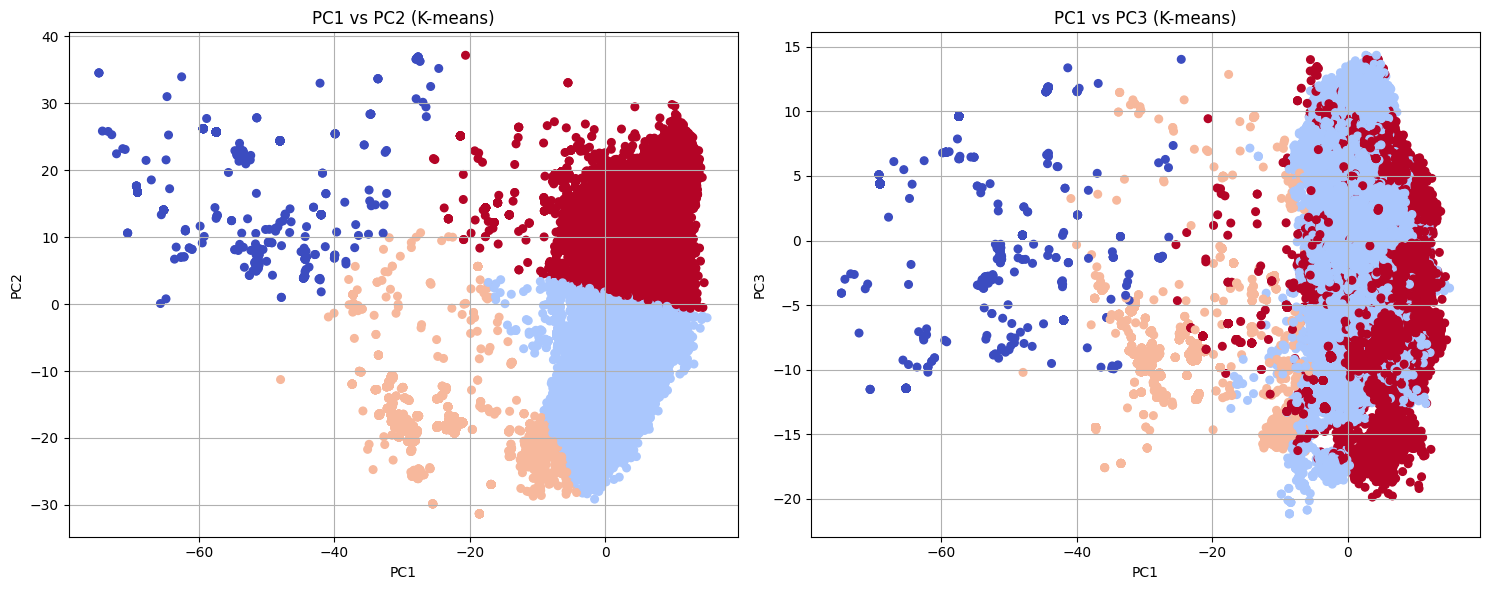

In [99]:
# K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init=20)
# Cluster assignments after clustering
labels = kmeans.fit_predict(embedding_reduced)

# Plotting the PCA with K-means clustering results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(scores[:, 0], scores[:, 1], c=labels, cmap='coolwarm', s=30)
axes[0].set_title("PC1 vs PC2 (K-means)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

axes[1].scatter(scores[:, 0], scores[:, 2], c=labels, cmap='coolwarm', s=30)
axes[1].set_title("PC1 vs PC3 (K-means)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")
axes[1].grid(True)

plt.tight_layout()
plt.show()

**The points are successfully grouped into four clusters, indicating that the K-Means algorithm has identified distinct groupings within the data.**

***1.7.1 K-Means Plot (PC1 vs PC2):***

*There is reasonable separation observed between clusters along PC1 (x-axis), suggesting that PC1 captures the most significant variation among the embeddings.*

*The tightness of the clusters implies that commands with similar or structural characteristics are grouped together, indicating fairly good clustering performance.*

***1.7.2 K-Means Plot (PC1 vs PC3):***

*Some overlap is observed between the red and blue clusters, suggesting that PC3 provides suggesting that PC3 is less effective at separating certain clusters compared to PC2.*

*While PC3 adds some variation, it does not contribute as strongly to the separation of clusters as PC1 and PC2.*

***1.7.3 Comparing K-means with different n_init values (optional)***

In [100]:
kmeans.labels_
kmeans1 = KMeans(n_clusters=4, random_state=4, n_init=1).fit(embedding_reduced)
kmeans20 = KMeans(n_clusters=4, random_state=4, n_init=20).fit(embedding_reduced)

kmeans1.inertia_, kmeans20.inertia_

(3184274.4467582856, 3184253.854936928)

*To identify the impact of initialisation on K-means algorithm  we trained two model with same n_clusters and same random_state but different n_init*

*n_init = 1 - K-means ran with single intialisation*

*n_init = 20 - K-means ran with 20 intialisation*

*The corresponding inertia values are:*

*n_init =1 : 3184274.4467582856*

*n_init =20 : 3184253.8549369285*

***Final Verdict: Using a higher n_init value slightly improved clustering results by reducing the inertia which is what was done above!***